In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Datasets/stroke.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df["stroke"].value_counts()

,count
stroke,
0,4861
1,249


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
med=df["bmi"].median()
df["bmi"].fillna(med,inplace=True)
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df.drop(["id"],axis=1,inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#print(df.dtypes)
df["gender"].value_counts()
df["Residence_type"].value_counts()
df["work_type"].value_counts()
df["smoking_status"].value_counts()



,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [ ]:
#to change the datatype obj to num
#male--->0 female--->1 other--->2
df["gender"]=df["gender"].map({"Male":0,"Female":1,"Other":2})
df["ever_married"]=df["ever_married"].map({"Yes":0,"No":1})
df["Residence_type"]=df["Residence_type"].map({"Rural":0,"Urban":1})
df["work_type"]=df["work_type"].map({"Private":0,"Self-employed":1,"children":2,"Govt_job":3,"Never_worked":4})
df["smoking_status"]=df["smoking_status"].map({"never smoked":1,"Unknown":1,"formerly smoked":0,"smokes":2})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,1,228.69,36.6,0,1
1,1,61.0,0,0,0,1,0,202.21,28.1,1,1
2,0,80.0,0,1,0,0,0,105.92,32.5,1,1
3,1,49.0,0,0,0,0,1,171.23,34.4,2,1
4,1,79.0,1,0,0,1,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,0,0,1,83.75,28.1,1,0
5106,1,81.0,0,0,0,1,1,125.20,40.0,1,0
5107,1,35.0,0,0,0,1,0,82.99,30.6,1,0
5108,0,51.0,0,0,0,0,0,166.29,25.6,0,0


In [ ]:
X=df.iloc[:,:-1]
print(X)
y=df.iloc[:,-1]
print(y)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             0          0   
1          1  61.0             0              0             0          1   
2          0  80.0             0              1             0          0   
3          1  49.0             0              0             0          0   
4          1  79.0             1              0             0          1   
...      ...   ...           ...            ...           ...        ...   
5105       1  80.0             1              0             0          0   
5106       1  81.0             0              0             0          1   
5107       1  35.0             0              0             0          1   
5108       0  51.0             0              0             0          0   
5109       1  44.0             0              0             0          3   

      Residence_type  avg_glucose_level   bmi  smoking_status  
0                  1   

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
X_Scaled=Scaler.fit_transform(X)
X_Scaled

array([[0.        , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.        ],
       [0.5       , 0.74365234, 0.        , ..., 0.67902317, 0.20389462,
        0.5       ],
       [0.        , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.5       ],
       ...,
       [0.5       , 0.42626953, 0.        , ..., 0.12865848, 0.2325315 ,
        0.5       ],
       [0.        , 0.62158203, 0.        , ..., 0.51320284, 0.17525773,
        0.        ],
       [0.5       , 0.53613281, 0.        , ..., 0.13922999, 0.18213058,
        0.5       ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.3)

In [ ]:
X_train.shape,y_train.shape

((3577, 10), (3577,))

In [ ]:
X_test.shape,y_test.shape

((1533, 10), (1533,))

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel="poly")
model.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predk=model.predict(X_test)
y_predk

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1460
           1       0.33      0.01      0.03        73

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



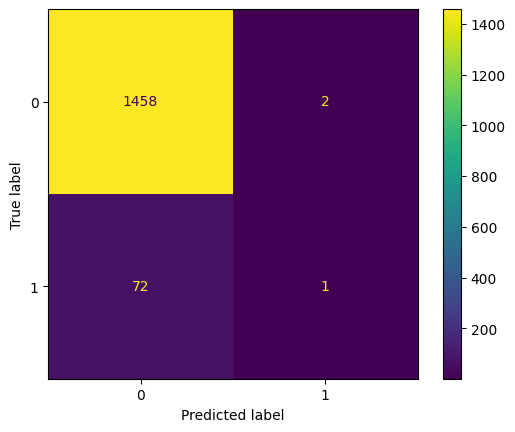

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_predk))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predk))

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1460
           1       0.27      0.08      0.13        73

    accuracy                           0.95      1533
   macro avg       0.61      0.54      0.55      1533
weighted avg       0.92      0.95      0.93      1533



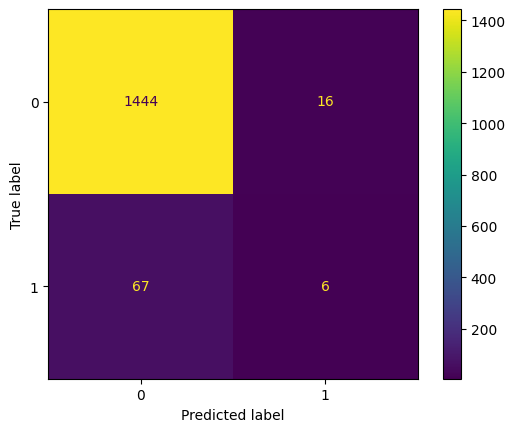

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
#imbalanced----->balanced
#oversampling
#undersampling

In [ ]:

from imblearn.over_sampling import SMOTE      #Synthetic Minority Oversampling Technique(SMOTE)is a class
os=SMOTE(random_state=1) #randomsatae coz
X_os,y_os=os.fit_resample(X,y)

In [ ]:
X_os.shape


(9722, 10)

In [ ]:
y_os.value_counts()

,count
stroke,
1,4861
0,4861


In [ ]:
scaler1=MinMaxScaler()
Xos_scaled=scaler1.fit_transform(X_os)
Xos_scaled

array([[0.        , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.        ],
       [0.5       , 0.74365234, 0.        , ..., 0.67902317, 0.20389462,
        0.5       ],
       [0.        , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.5       ],
       ...,
       [0.        , 0.72648581, 0.        , ..., 0.25960887, 0.1995634 ,
        0.5       ],
       [0.5       , 0.92794217, 0.        , ..., 0.32464562, 0.23548928,
        0.5       ],
       [0.        , 0.97338516, 0.        , ..., 0.85203563, 0.19676703,
        0.5       ]])

In [ ]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(Xos_scaled,y_os,test_size=0.3,random_state=1)

In [ ]:
sv=SVC()
sv.fit(X_train_os,y_train_os)

SVC()

In [ ]:
y_preds=sv.predict(X_test_os)
y_preds

array([1, 1, 0, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1453
           1       0.80      0.88      0.84      1464

    accuracy                           0.83      2917
   macro avg       0.83      0.83      0.83      2917
weighted avg       0.83      0.83      0.83      2917



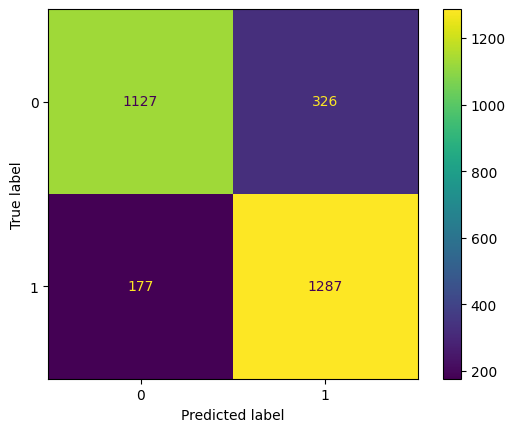

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test_os,y_preds))
print(ConfusionMatrixDisplay.from_predictions(y_test_os,y_preds))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [ ]:
y_us.value_counts()

,count
stroke,
0,249
1,249


In [ ]:
Scaler2=MinMaxScaler()
X_Scaled2= Scaler2.fit_transform(X_us)
X_Scaled2


array([[1.        , 0.85126425, 1.        , ..., 0.20168808, 0.41914894,
        0.        ],
       [1.        , 0.96281606, 0.        , ..., 0.10300051, 0.37021277,
        0.5       ],
       [1.        , 0.15716411, 0.        , ..., 0.34049066, 0.14255319,
        0.5       ],
       ...,
       [1.        , 0.91323748, 0.        , ..., 0.10522655, 0.31276596,
        0.        ],
       [0.        , 0.8636589 , 1.        , ..., 0.14696471, 0.28723404,
        0.5       ],
       [1.        , 0.95042142, 0.        , ..., 0.10527292, 0.10638298,
        0.5       ]])

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_Scaled2,y_us,test_size=0.3,random_state=1)

In [ ]:
sv1=SVC()
sv1.fit(X_train_us,y_train_us)

SVC()

In [ ]:
y_predz=sv1.predict(X_test_us)
y_predz

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.73      0.68      0.70        68
           1       0.75      0.79      0.77        82

    accuracy                           0.74       150
   macro avg       0.74      0.73      0.74       150
weighted avg       0.74      0.74      0.74       150



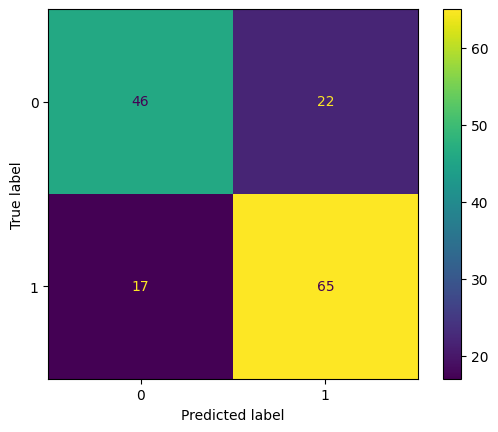

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test_us,y_predz))
print(ConfusionMatrixDisplay.from_predictions(y_test_us,y_predz))